
# Programming and Visualisation

This exercise is to familiarize yourself with one of the programming environments and introduce standard ways of visualisation. Possible options are Python, R, Julia or MATLAB. For more details, see the programming resources on ISIS.The submission procedure (upload to ISIS) can be found in the organizational slides.



## 1.1 Scatter and Line Plots (3 points)

(a) Read the data in the file expDat.txt (available on ISIS). Each row contains the number of events (of 20 observed processes) counted in one of 100 subsequent time intervals. The first column contains the respective time index. Each other column corresponds to one of 20 different observed processes.

In [1]:
import numpy as np
import math as m
import csv

In [2]:
# load data
Data = np.genfromtxt("expDat.txt", delimiter=',', skip_header=True,dtype='float')
# skip first row ("1","2",..)
expDat = Data[:,1:]

(b) Create a line plot – one line for each column where the X-axis refers to time index.

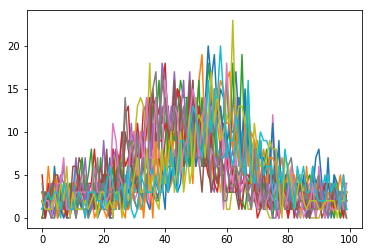

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
t = np.arange(100)
for i in range(20):
    plt.plot(t, expDat[:,i])

plt.show()

(c) Create a scatter plot matrix for the first 5 columns (i.e., 25 pairwise scatter plots).

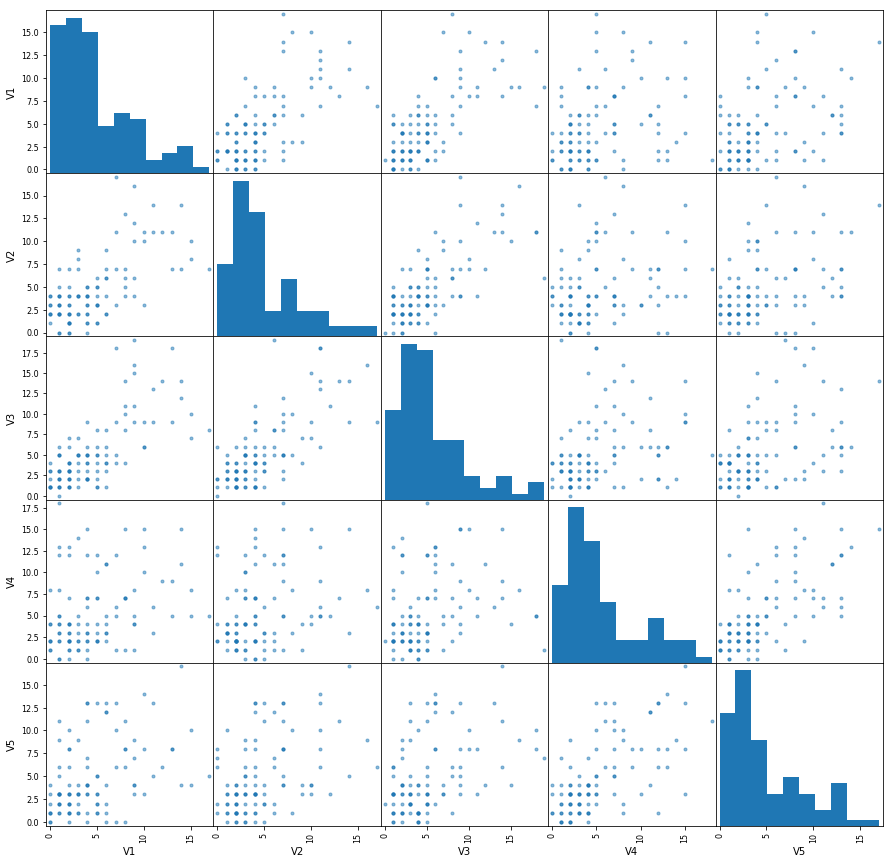

In [4]:
import pandas as pd

df = pd.DataFrame({'V1': expDat[:,0],'V2': expDat[:,1],'V3': expDat[:,2],'V4': expDat[:,3],'V5': expDat[:,4]}, columns=['V1', 'V2','V3','V4','V5'])
spm = pd.tools.plotting.scatter_matrix(df, alpha=0.5, figsize=(15, 15))

(d) Compute the covariance matrix by centering & matrix multiplication – without looping over
the data. Plot this matrix with a heatplot and compare it to the result when using inbuilt
functions such as cov or cor.

(100, 100)


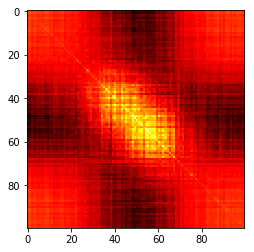

In [5]:
Mean=np.mean(expDat,axis=0)
cenDat=expDat-Mean
cov=np.dot(cenDat,cenDat.T)/100
print(cov.shape)
plt.imshow(cov, cmap='hot', interpolation='nearest')
plt.show()


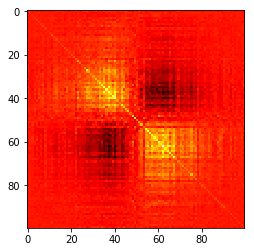

In [6]:
cov2=np.cov(expDat)
plt.imshow(cov2, cmap='hot', interpolation='nearest')
plt.show()


## 1.2 Plotting 3d (5 points)

(a) Read the data contained in the file pca-data-3d.txt.

In [7]:
# load data
pcaData = np.genfromtxt("pca-data-3d.txt", delimiter=',', skip_header=True,dtype='float')

(b) Make a scatter plot matrix for all the columns.

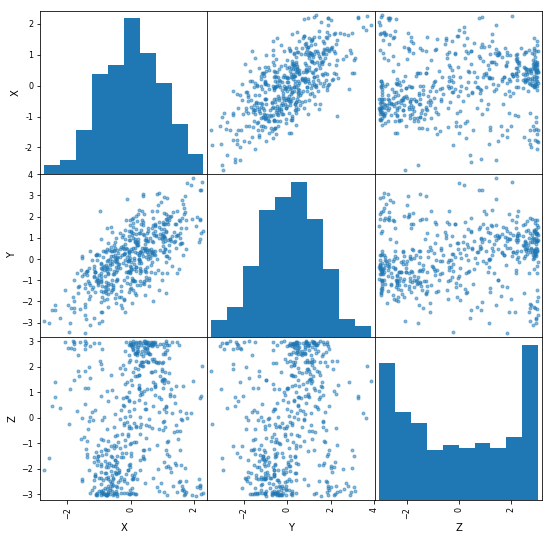

In [8]:
df = pd.DataFrame({'X': pcaData[:,0],'Y': pcaData[:,1],'Z': pcaData[:,2]}, columns=['X', 'Y','Z'])
spm = pd.tools.plotting.scatter_matrix(df, alpha=0.5, figsize=(9, 9))

(c) Visualize the data in 3d. How do you interpret your results?

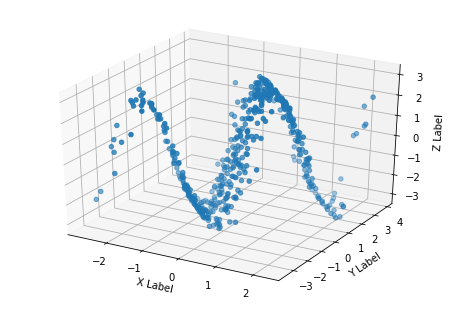

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pcaData[:,0], pcaData[:,1], zs=pcaData[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

Interpretation: Looks like a spiral/wave distribution, not visible in 2D

(d) Pick the first two dimensions and plot the data in a scatter plot. Project the 2d data onto
the unit vectors with angles 0, 15, ..., 180 degrees from the x-axis and compute the variance
along these directions. Plot variance against angle.

In [10]:
def w_from_angle(alpha, scale=1):
    return np.array([m.cos(m.radians(alpha))*scale, m.sin(m.radians(alpha))*scale])

In [11]:
 def W_from_angles(alphas):
    W = np.zeros((angles.shape[0], 2))
    for i, angle in enumerate(angles):
        W[i] = w_from_angle(angle)
    return W.T

(2, 13)
[ -1.94263290e-01   2.03461295e-02   8.32259382e-01   7.76872849e-01
  -2.55273498e-02   1.04603845e+00  -1.97691845e-01  -1.36082591e+00
   4.05139058e-01  -1.60556483e-01   9.35616586e-01  -3.49719086e-01
   4.22781813e-01   2.63397433e-01  -5.21081416e-01   2.19447871e+00
   3.30037403e-02   7.10020415e-01   5.76154670e-02  -6.95406299e-01
   2.92645251e-01  -2.62721495e-01  -4.19040713e-01   7.57570486e-01
   9.04007626e-01  -1.12985739e+00   2.07169545e-01   1.78710131e-01
   6.15877063e-01  -4.52706747e-01  -8.91286643e-01   4.02074642e-01
  -1.31137884e+00   1.00554235e+00   8.09617931e-01  -1.66164949e+00
  -7.71031945e-01  -6.98148709e-01   2.09005068e-01   7.57157600e-01
  -1.81710226e+00  -3.24990940e-02  -7.89379624e-01   1.57390575e-01
  -1.18864823e-01  -8.46931281e-01  -2.42082929e-01   8.41465990e-02
   6.78924552e-01  -1.98618331e+00   5.80463768e-01  -7.01526767e-01
   1.80879846e-01   7.66601440e-02  -1.86037094e-01  -4.47217435e-01
  -4.92393755e-01  -1.5460

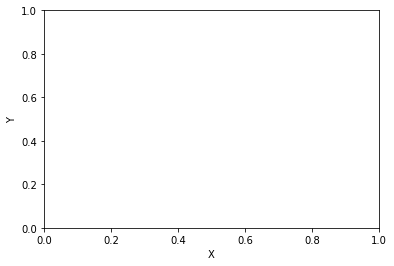

In [12]:
angles = np.array(range(0,195,15))
W = W_from_angles(angles)
print(W.shape)
print(pcaData[:,0],pcaData[:,1])

y = np.sign(W.T.dot((pcaData[:,0],pcaData[:,1])))

plt.xlabel('X')
plt.ylabel('Y')

## 1.3 Data Processing: Image data (2 points)

(a) Read in the data from the file natIMG.jpg.

In [13]:
import matplotlib.image as mpimg

img=mpimg.imread('natIMG.jpg')
data = np.asarray(img)
# Normalize data
data_norm = data * (1.0/data.max())

(b) Plot the data using a heatmap with a ’color’ scale ranging from black (minimal value of all
image pixels) to white (maximal occuring pixel value).

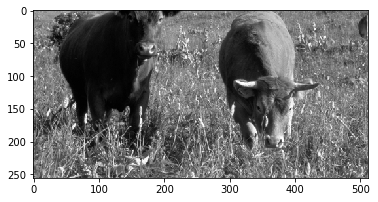

In [14]:
#imgplot=plt.imshow(img)

img = plt.imshow(data_norm, clim=(np.min(data_norm), np.max(data_norm)))
img.set_cmap('gray')

(c) Sample 100 image patches of size 10x10=100 pixels.

In [15]:
import random
from uuid import uuid4
patches=[]
for i in range(100):
    x=random.randint(0, data_norm.shape[0]-10)
    y=random.randint(0, data_norm.shape[1]-10)
    patch=data_norm[x:x+10, y:y+10]
    patches.append(patch)

(d) Plot these patches using the same color scheme as above.

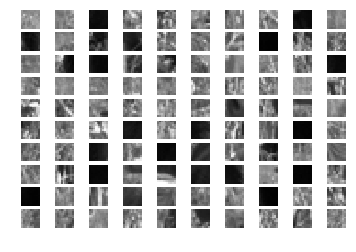

In [16]:
fig = plt.figure()
for i in range(100):
    a = fig.add_subplot(10,10,i+1)
    a.imshow(patches[i], clim=(np.min(data_norm), np.max(data_norm))).set_cmap('gray')
    a.axis('off')

(e) Plot these patches using the inverted color scheme (white minimal, black maximal pixel
value).

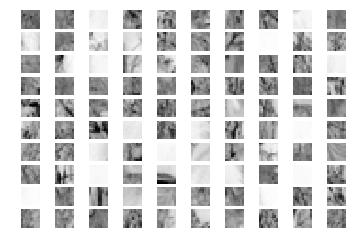

In [17]:
fig = plt.figure()
for i in range(100):
    a = fig.add_subplot(10,10,i+1)
    a.imshow(patches[i], clim=(np.min(data_norm), np.max(data_norm))).set_cmap('gray_r')
    a.axis('off')